# Redes Neuronales Convolucionales

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D # --> Parte Convolituva

Bajamos la base de **MNIST**

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Imrimimos la etiqueta de **Y** y los valores de **X**

(60000, 28, 28)
0


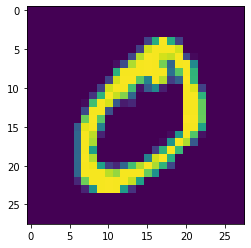

In [107]:
import pylab as plt
print(X_train.shape)

n = 1
plt.imshow(X_train[n])
print(y_train[n])

### Prepocesamiento de los Datos

1. Hacemos una trasformación generando una dimensión adicional para que funcione con imagenes a color

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [109]:
X_train.shape

(60000, 28, 28, 1)

2. Sacamos una muestra de 3K datos, para reducir el tema de computo

In [110]:
data_slice = 20000
print(X_train.shape)
X_train = X_train[:data_slice, :, :, :]
y_train = y_train[:data_slice]
X_test = X_test[:data_slice, :, :, :]
y_test = y_test[:data_slice]
print(X_train.shape)

(60000, 28, 28, 1)
(20000, 28, 28, 1)


3. Escalamos de 0 a 1

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Escalamos
X_train /= 255
X_test /= 255

4. Hacemos un One Hot Encoding

In [0]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

## Creamos el modelo de Redes Neuronales Convolutivas

0. Incializamos el modelo

In [0]:
modelo = Sequential()
# Parte Convolutiva
modelo.add(Conv2D(256, kernel_size=(7,7), activation='relu', input_shape=input_shape))
modelo.add(Conv2D(128, kernel_size=(6,6), activation='relu'))
modelo.add(Conv2D(64, kernel_size=(5,5), activation='relu'))
modelo.add(Conv2D(32, kernel_size=(4,4), activation='relu'))
modelo.add(Conv2D(16, kernel_size=(3,3), activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2,2)))

1. Hacemos el modelo unidimensional

In [0]:
# Lo hacemos un modelo unidimensional
modelo.add(Flatten())
modelo.add(Dense(128, activation='relu')) # unidades, activacion
modelo.add(Dense(64, activation='relu')) # unidades, activacion
modelo.add(Dense(32, activation='relu')) # unidades, activacion
modelo.add(Dense(10, activation='softmax')) # En la capa de salida damos 10 salidas usando softmax

2. Compilamos el modelo

In [0]:
modelo.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

3. Ajustamos el modelo

In [116]:
modelo.fit(X_train, y_train, batch_size=250, epochs=100, #verbose=0, 
           validation_data=(X_test, y_test))

Train on 20000 samples, validate on 10000 samples
Epoch 1/100
20000/20000 [==============================] - 4s 198us/step - loss: 1.5562 - accuracy: 0.4854 - val_loss: 0.4431 - val_accuracy: 0.8723
Epoch 2/100
20000/20000 [==============================] - 3s 162us/step - loss: 0.3782 - accuracy: 0.8885 - val_loss: 0.1963 - val_accuracy: 0.9390
Epoch 3/100
20000/20000 [==============================] - 3s 162us/step - loss: 0.1657 - accuracy: 0.9512 - val_loss: 0.1036 - val_accuracy: 0.9682
Epoch 4/100
20000/20000 [==============================] - 3s 162us/step - loss: 0.1219 - accuracy: 0.9631 - val_loss: 0.1021 - val_accuracy: 0.9672
Epoch 5/100
20000/20000 [==============================] - 3s 162us/step - loss: 0.0916 - accuracy: 0.9727 - val_loss: 0.0778 - val_accuracy: 0.9758
Epoch 6/100
20000/20000 [==============================] - 3s 163us/step - loss: 0.0812 - accuracy: 0.9769 - val_loss: 0.0680 - val_accuracy: 0.9787
Epoch 7/100
20000/20000 [==============================]

4. Imrpimimos el Accuacy

In [117]:
score = modelo.evaluate(X_test, y_test)
print(score[0], score[1])

10000/10000 [==============================] - 1s 126us/step
0.08548579572775475 0.9897000193595886
